# WhatsApp Chat Data Analysis

I have planned to do a brief data analysis on the WhatsApp Chat to get a better understanding of the type of messages, timeline of the messages and to obtain a brief statistics of the messages I receive over whatsapp. I have extracted the chat from one of my college whatsapp group and have exported here to analyze it. Here, I would be using various python libraries like numpy, pandas, regex, nltk, matplotlib, seaborn etc to get a clear visualization of the data.

### Installing the required modules

In [ ]:
pip install urlextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 8.0 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=64364be5150a77c400c9fb7aa6f68c2d4ce3e16a5db20de2f0132387300bdbf7
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


### Importing Libraries

In [267]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urlextract import URLExtract
from wordcloud import WordCloud
from collections import Counter
import emoji

### Importing the Whatsapp Chat text file

In [268]:
f = open('_chat.txt', 'r', encoding='utf')

In [269]:
data_unicode = f.read()

In [270]:
string_encode = data_unicode.encode("ascii", "ignore")
string_decode = string_encode.decode()
string_decode

"[19/03/20, 10:39:47AM] Kotak-DWH-REL-IT-Team: Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[19/03/20, 10:39:47AM] Kotak-DWH-REL-IT-Team: Group creator created this group\n[28/07/23, 2:47:12PM] Kotak-DWH-REL-IT-Team: Yogesh Kotak Buddy added you\n[28/07/23, 2:47:58PM] Yogesh Kotak Buddy: Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsApp grp ...\n[28/07/23, 2:49:24PM] Suraj Thakur Kotak Team: Hi All.. Kindly complete your Mandatory training today or by tomorrow.\n[28/07/23, 3:03:09PM] Isha KOTAK: Yes Sir!\n[28/07/23, 3:12:35PM] Harsh Kotak: Yes sir \n[28/07/23, 3:48:25PM] ~Satya Dixit (DWH RTB): This message was deleted.\n[28/07/23, 4:58:06PM] ~Satya Dixit (DWH RTB): @918970110344 pls breif Suraj on job scheduling\n@919987411275 pls keep a track..\n[28/07/23, 4:58:29PM] ~Nandi: Yeah sure\n[28/07/23, 9:08:15PM] Yogesh Kotak Buddy: image omitted\n[28/07/23, 9:12:01PM] Yogesh Kotak Buddy: image omitted\n[28/07/23, 

In [271]:
data = string_decode

In [272]:
data

"[19/03/20, 10:39:47AM] Kotak-DWH-REL-IT-Team: Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[19/03/20, 10:39:47AM] Kotak-DWH-REL-IT-Team: Group creator created this group\n[28/07/23, 2:47:12PM] Kotak-DWH-REL-IT-Team: Yogesh Kotak Buddy added you\n[28/07/23, 2:47:58PM] Yogesh Kotak Buddy: Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsApp grp ...\n[28/07/23, 2:49:24PM] Suraj Thakur Kotak Team: Hi All.. Kindly complete your Mandatory training today or by tomorrow.\n[28/07/23, 3:03:09PM] Isha KOTAK: Yes Sir!\n[28/07/23, 3:12:35PM] Harsh Kotak: Yes sir \n[28/07/23, 3:48:25PM] ~Satya Dixit (DWH RTB): This message was deleted.\n[28/07/23, 4:58:06PM] ~Satya Dixit (DWH RTB): @918970110344 pls breif Suraj on job scheduling\n@919987411275 pls keep a track..\n[28/07/23, 4:58:29PM] ~Nandi: Yeah sure\n[28/07/23, 9:08:15PM] Yogesh Kotak Buddy: image omitted\n[28/07/23, 9:12:01PM] Yogesh Kotak Buddy: image omitted\n[28/07/23, 

In [277]:
pattern = '.\d{1,2}[\/]\d{1,2}[\/]\d{2,4}, \d{1,2}:\d{1,2}:\d{1,2}[A|P]M.'

In [278]:
re.search(pattern, data)

<re.Match object; span=(0, 22), match='[19/03/20, 10:39:47AM]'>

In [279]:
re.search(pattern, data)

<re.Match object; span=(0, 22), match='[19/03/20, 10:39:47AM]'>

In [280]:
messages = re.split(pattern, data)[1:]

In [281]:
messages

[' Kotak-DWH-REL-IT-Team: Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 ' Kotak-DWH-REL-IT-Team: Group creator created this group\n',
 ' Kotak-DWH-REL-IT-Team: Yogesh Kotak Buddy added you\n',
 ' Yogesh Kotak Buddy: Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsApp grp ...\n',
 ' Suraj Thakur Kotak Team: Hi All.. Kindly complete your Mandatory training today or by tomorrow.\n',
 ' Isha KOTAK: Yes Sir!\n',
 ' Harsh Kotak: Yes sir \n',
 ' ~Satya Dixit (DWH RTB): This message was deleted.\n',
 ' ~Satya Dixit (DWH RTB): @918970110344 pls breif Suraj on job scheduling\n@919987411275 pls keep a track..\n',
 ' ~Nandi: Yeah sure\n',
 ' Yogesh Kotak Buddy: image omitted\n',
 ' Yogesh Kotak Buddy: image omitted\n',
 ' ~Satya Dixit (DWH RTB): This is already shared by nayana\n',
 ' Yogesh Kotak Buddy: image omitted\n',
 ' Yogesh Kotak Buddy: @918296623736 ... run book nt rcvd for last week .... any plans for this week?

In [282]:
dates = re.findall(pattern, data)

In [283]:
dates

['[19/03/20, 10:39:47AM]',
 '[19/03/20, 10:39:47AM]',
 '[28/07/23, 2:47:12PM]',
 '[28/07/23, 2:47:58PM]',
 '[28/07/23, 2:49:24PM]',
 '[28/07/23, 3:03:09PM]',
 '[28/07/23, 3:12:35PM]',
 '[28/07/23, 3:48:25PM]',
 '[28/07/23, 4:58:06PM]',
 '[28/07/23, 4:58:29PM]',
 '[28/07/23, 9:08:15PM]',
 '[28/07/23, 9:12:01PM]',
 '[28/07/23, 9:16:40PM]',
 '[28/07/23, 9:35:01PM]',
 '[29/07/23, 8:44:48AM]',
 '[29/07/23, 6:20:52PM]',
 '[31/07/23, 8:42:12AM]',
 '[31/07/23, 12:33:44PM]',
 '[31/07/23, 4:31:36PM]',
 '[31/07/23, 4:33:26PM]',
 '[31/07/23, 4:45:14PM]',
 '[31/07/23, 5:41:25PM]',
 '[31/07/23, 6:22:33PM]',
 '[01/08/23, 8:42:28AM]',
 '[03/08/23, 10:27:39AM]',
 '[03/08/23, 10:28:18AM]',
 '[03/08/23, 11:26:20AM]',
 '[03/08/23, 4:34:11PM]',
 '[03/08/23, 4:37:10PM]',
 '[03/08/23, 4:37:29PM]',
 '[04/08/23, 8:08:19AM]',
 '[04/08/23, 10:47:39AM]',
 '[04/08/23, 11:40:51AM]',
 '[04/08/23, 2:33:01PM]',
 '[04/08/23, 10:07:24PM]',
 '[04/08/23, 10:07:41PM]',
 '[04/08/23, 10:15:05PM]',
 '[04/08/23, 10:16:06PM]',


In [284]:
" ".join(dates)

'[19/03/20, 10:39:47AM] [19/03/20, 10:39:47AM] [28/07/23, 2:47:12PM] [28/07/23, 2:47:58PM] [28/07/23, 2:49:24PM] [28/07/23, 3:03:09PM] [28/07/23, 3:12:35PM] [28/07/23, 3:48:25PM] [28/07/23, 4:58:06PM] [28/07/23, 4:58:29PM] [28/07/23, 9:08:15PM] [28/07/23, 9:12:01PM] [28/07/23, 9:16:40PM] [28/07/23, 9:35:01PM] [29/07/23, 8:44:48AM] [29/07/23, 6:20:52PM] [31/07/23, 8:42:12AM] [31/07/23, 12:33:44PM] [31/07/23, 4:31:36PM] [31/07/23, 4:33:26PM] [31/07/23, 4:45:14PM] [31/07/23, 5:41:25PM] [31/07/23, 6:22:33PM] [01/08/23, 8:42:28AM] [03/08/23, 10:27:39AM] [03/08/23, 10:28:18AM] [03/08/23, 11:26:20AM] [03/08/23, 4:34:11PM] [03/08/23, 4:37:10PM] [03/08/23, 4:37:29PM] [04/08/23, 8:08:19AM] [04/08/23, 10:47:39AM] [04/08/23, 11:40:51AM] [04/08/23, 2:33:01PM] [04/08/23, 10:07:24PM] [04/08/23, 10:07:41PM] [04/08/23, 10:15:05PM] [04/08/23, 10:16:06PM] [04/08/23, 10:16:18PM] [04/08/23, 10:16:31PM] [04/08/23, 10:16:47PM] [05/08/23, 10:19:49AM] [05/08/23, 10:46:57AM] [05/08/23, 11:39:56AM] [05/08/23, 11

In [285]:
pattern2 = '\d{1,2}[\/]\d{1,2}[\/]\d{2,4}, \d{1,2}:\d{1,2}:\d{1,2}[A|P]M'

In [286]:
dates = re.findall(pattern2, " ".join(dates))

In [287]:
dates

['19/03/20, 10:39:47AM',
 '19/03/20, 10:39:47AM',
 '28/07/23, 2:47:12PM',
 '28/07/23, 2:47:58PM',
 '28/07/23, 2:49:24PM',
 '28/07/23, 3:03:09PM',
 '28/07/23, 3:12:35PM',
 '28/07/23, 3:48:25PM',
 '28/07/23, 4:58:06PM',
 '28/07/23, 4:58:29PM',
 '28/07/23, 9:08:15PM',
 '28/07/23, 9:12:01PM',
 '28/07/23, 9:16:40PM',
 '28/07/23, 9:35:01PM',
 '29/07/23, 8:44:48AM',
 '29/07/23, 6:20:52PM',
 '31/07/23, 8:42:12AM',
 '31/07/23, 12:33:44PM',
 '31/07/23, 4:31:36PM',
 '31/07/23, 4:33:26PM',
 '31/07/23, 4:45:14PM',
 '31/07/23, 5:41:25PM',
 '31/07/23, 6:22:33PM',
 '01/08/23, 8:42:28AM',
 '03/08/23, 10:27:39AM',
 '03/08/23, 10:28:18AM',
 '03/08/23, 11:26:20AM',
 '03/08/23, 4:34:11PM',
 '03/08/23, 4:37:10PM',
 '03/08/23, 4:37:29PM',
 '04/08/23, 8:08:19AM',
 '04/08/23, 10:47:39AM',
 '04/08/23, 11:40:51AM',
 '04/08/23, 2:33:01PM',
 '04/08/23, 10:07:24PM',
 '04/08/23, 10:07:41PM',
 '04/08/23, 10:15:05PM',
 '04/08/23, 10:16:06PM',
 '04/08/23, 10:16:18PM',
 '04/08/23, 10:16:31PM',
 '04/08/23, 10:16:47PM',
 

A dataframe is formed with user_message and date as columns obtained using regex through split function with respect to the pattern mentioned.

In [288]:
type(dates)

list

In [289]:
dates

['19/03/20, 10:39:47AM',
 '19/03/20, 10:39:47AM',
 '28/07/23, 2:47:12PM',
 '28/07/23, 2:47:58PM',
 '28/07/23, 2:49:24PM',
 '28/07/23, 3:03:09PM',
 '28/07/23, 3:12:35PM',
 '28/07/23, 3:48:25PM',
 '28/07/23, 4:58:06PM',
 '28/07/23, 4:58:29PM',
 '28/07/23, 9:08:15PM',
 '28/07/23, 9:12:01PM',
 '28/07/23, 9:16:40PM',
 '28/07/23, 9:35:01PM',
 '29/07/23, 8:44:48AM',
 '29/07/23, 6:20:52PM',
 '31/07/23, 8:42:12AM',
 '31/07/23, 12:33:44PM',
 '31/07/23, 4:31:36PM',
 '31/07/23, 4:33:26PM',
 '31/07/23, 4:45:14PM',
 '31/07/23, 5:41:25PM',
 '31/07/23, 6:22:33PM',
 '01/08/23, 8:42:28AM',
 '03/08/23, 10:27:39AM',
 '03/08/23, 10:28:18AM',
 '03/08/23, 11:26:20AM',
 '03/08/23, 4:34:11PM',
 '03/08/23, 4:37:10PM',
 '03/08/23, 4:37:29PM',
 '04/08/23, 8:08:19AM',
 '04/08/23, 10:47:39AM',
 '04/08/23, 11:40:51AM',
 '04/08/23, 2:33:01PM',
 '04/08/23, 10:07:24PM',
 '04/08/23, 10:07:41PM',
 '04/08/23, 10:15:05PM',
 '04/08/23, 10:16:06PM',
 '04/08/23, 10:16:18PM',
 '04/08/23, 10:16:31PM',
 '04/08/23, 10:16:47PM',
 

In [290]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

df['message_date'] = pd.to_datetime(df['message_date'])

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Kotak-DWH-REL-IT-Team: Messages and calls are...,2020-03-19 10:39:47
1,Kotak-DWH-REL-IT-Team: Group creator created ...,2020-03-19 10:39:47
2,Kotak-DWH-REL-IT-Team: Yogesh Kotak Buddy add...,2023-07-28 14:47:12
3,"Yogesh Kotak Buddy: Harsh, Isha, Rutuja, Saga...",2023-07-28 14:47:58
4,Suraj Thakur Kotak Team: Hi All.. Kindly comp...,2023-07-28 14:49:24


In [291]:
df.shape

(963, 2)

In [292]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?): ', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

In [293]:
df['user'] = users
df['message'] = messages

Once again using regex split function, the dataset is further being splitted dividing the user_messages into usernames and the specific messages. All the group notification messages are being assigned to a user named as group_notification to avoid confusion.

In [294]:
df

,user_message,date,user,message
0,Kotak-DWH-REL-IT-Team: Messages and calls are...,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...
1,Kotak-DWH-REL-IT-Team: Group creator created ...,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n
2,Kotak-DWH-REL-IT-Team: Yogesh Kotak Buddy add...,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n
3,"Yogesh Kotak Buddy: Harsh, Isha, Rutuja, Saga...",2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA..."
4,Suraj Thakur Kotak Team: Hi All.. Kindly comp...,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...
...,...,...,...,...
958,~9967224436: Happy Marriage Anniversary Suraj\n,2024-03-02 11:53:31,~9967224436,Happy Marriage Anniversary Suraj\n
959,~Prajakta Kerkar: Happy Anniversary @91998741...,2024-03-02 16:02:24,~Prajakta Kerkar,Happy Anniversary @919987411275 \n
960,~Ajinkya: Happy marriage anniversary Suraj\n,2024-03-02 20:12:54,~Ajinkya,Happy marriage anniversary Suraj\n
961,"~Dinesh Makhijani: Team,\nI will be on leave ...",2024-03-02 22:21:55,~Dinesh Makhijani,"Team,\nI will be on leave from 05-Feb-2024 to ..."


The date column is also split into various sub branches like year, month, day, hour, minute and many more using the dt attribute of datetime in pandas and have been added into the dataset using separate columns.

In [295]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['month_num'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['only_date'] = df['date'].dt.date
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute



df.head()

,user_message,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute
0,Kotak-DWH-REL-IT-Team: Messages and calls are...,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...,2020,March,3,19,2020-03-19,Thursday,10,39
1,Kotak-DWH-REL-IT-Team: Group creator created ...,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n,2020,March,3,19,2020-03-19,Thursday,10,39
2,Kotak-DWH-REL-IT-Team: Yogesh Kotak Buddy add...,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n,2023,July,7,28,2023-07-28,Friday,14,47
3,"Yogesh Kotak Buddy: Harsh, Isha, Rutuja, Saga...",2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA...",2023,July,7,28,2023-07-28,Friday,14,47
4,Suraj Thakur Kotak Team: Hi All.. Kindly comp...,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...,2023,July,7,28,2023-07-28,Friday,14,49


In [296]:
df.drop(columns = ['user_message'], inplace = True, axis = 1)

This would be the final dataset, df which we would be using to analyze the chat data.

In [297]:
df

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute
0,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...,2020,March,3,19,2020-03-19,Thursday,10,39
1,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n,2020,March,3,19,2020-03-19,Thursday,10,39
2,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n,2023,July,7,28,2023-07-28,Friday,14,47
3,2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA...",2023,July,7,28,2023-07-28,Friday,14,47
4,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...,2023,July,7,28,2023-07-28,Friday,14,49
...,...,...,...,...,...,...,...,...,...,...,...
958,2024-03-02 11:53:31,~9967224436,Happy Marriage Anniversary Suraj\n,2024,March,3,2,2024-03-02,Saturday,11,53
959,2024-03-02 16:02:24,~Prajakta Kerkar,Happy Anniversary @919987411275 \n,2024,March,3,2,2024-03-02,Saturday,16,2
960,2024-03-02 20:12:54,~Ajinkya,Happy marriage anniversary Suraj\n,2024,March,3,2,2024-03-02,Saturday,20,12
961,2024-03-02 22:21:55,~Dinesh Makhijani,"Team,\nI will be on leave from 05-Feb-2024 to ...",2024,March,3,2,2024-03-02,Saturday,22,21


## Statistical Analysis

In [298]:
user_list = df['user'].unique().tolist()
user_list

[' Kotak-DWH-REL-IT-Team',
 ' Yogesh Kotak Buddy',
 ' Suraj Thakur Kotak Team',
 ' Isha KOTAK',
 ' Harsh Kotak',
 ' ~Satya Dixit (DWH RTB)',
 ' ~Nandi',
 ' ~9967224436',
 ' Amit Roy Kotak',
 ' ~Pradip',
 ' ~Waseem Akram',
 ' ~Rutuja Bhagane',
 ' Sagar Lamani',
 ' ~Anurag Jain',
 ' ~Ajinkya',
 ' ~Prajakta Kerkar',
 ' ~Dinesh Makhijani']

In [299]:
user_list.remove(' Kotak-DWH-REL-IT-Team')
user_list.sort()
user_list

[' Amit Roy Kotak',
 ' Harsh Kotak',
 ' Isha KOTAK',
 ' Sagar Lamani',
 ' Suraj Thakur Kotak Team',
 ' Yogesh Kotak Buddy',
 ' ~9967224436',
 ' ~Ajinkya',
 ' ~Anurag Jain',
 ' ~Dinesh Makhijani',
 ' ~Nandi',
 ' ~Pradip',
 ' ~Prajakta Kerkar',
 ' ~Rutuja Bhagane',
 ' ~Satya Dixit (DWH RTB)',
 ' ~Waseem Akram']

In [300]:
len(user_list)

16

This shows that, from the day it is created there are 83 users involved in this whatsapp group.

In [301]:
def fetch_stats(selected_user, df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  # Number of messages and total number of words
  num_messages = df.shape[0]
  words = []
  for message in df['message']:
    words.extend(message.split())

  # Number of media messages
  num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

  # Number of links shared
  extract = URLExtract()
  links = []
  for message in df['message']:
    links.extend(extract.find_urls(message))


  print("Total Number of Messages - {}, Total Number of Words - {}, Number of Media shared - {}, Number of links shared - {}".format(num_messages, len(words), num_media_messages, len(links)))

The fetch_stats(selected_user, df) function returns some of the Statistical analysis of the chats of the group, both overall as a group and of a selected user of the group. It returns total number of messages and words involved in the chat and also we would get to know how many media and links are being shared over the group both overall and by an user shared to the group.

In [302]:
fetch_stats('Overall', df)

Total Number of Messages - 963, Total Number of Words - 7297, Number of Media shared - 0, Number of links shared - 4


In [303]:
fetch_stats(' Yogesh Kotak Buddy', df)

Total Number of Messages - 271, Total Number of Words - 2413, Number of Media shared - 0, Number of links shared - 1


We could ge to know about the busiest persons of the group, who basically being active sends too many messages. most_busy_users(df) function returns top 5 busiest users of the group. A bar graph is plotted to obtain a better view of this stat.

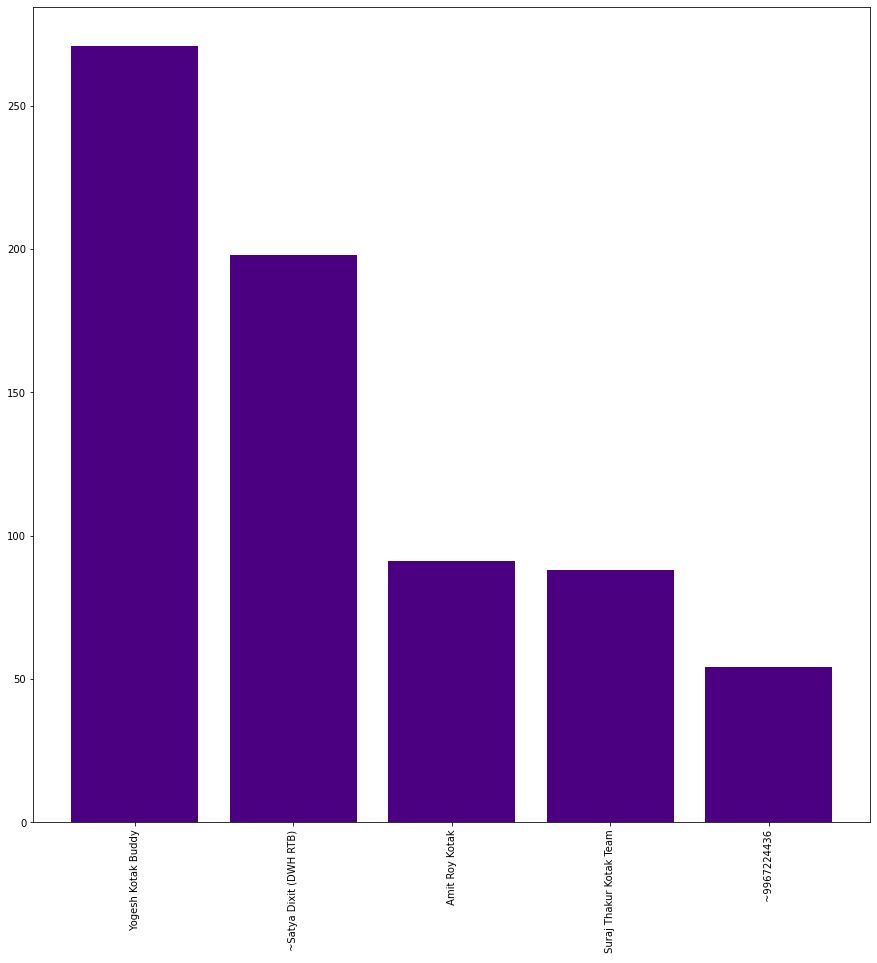

,name,percent
0,Yogesh Kotak Buddy,28.14
1,~Satya Dixit (DWH RTB),20.56
2,Amit Roy Kotak,9.45
3,Suraj Thakur Kotak Team,9.14
4,~9967224436,5.61
5,~Nandi,4.78
6,~Waseem Akram,4.67
7,~Pradip,3.95
8,~Rutuja Bhagane,2.49
9,~Anurag Jain,2.18


In [304]:
# Busiest users in the group
def most_busy_users(df):
  x = df['user'].value_counts().head()
  new_df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
  plt.bar(x.index, x.values, color = 'indigo')
  plt.rcParams['figure.figsize'] = [15, 15]
  plt.xticks(rotation = 'vertical')
  plt.show()
  return new_df

most_busy_users(df)

In [305]:
# most common used words

def most_common_words(selected_user, df):
  f = open('stop_hinglish.txt', 'r')
  stop_words = f.read()

  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  temp = df[df['user'] != 'group_notification']
  temp = temp[temp['message'] != '<Media omitted>\n']  

  words = []
  for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

  most_common_df = pd.DataFrame(Counter(words).most_common(20))
  
  plt.barh(most_common_df[0], most_common_df[1], color = 'green')
  plt.xticks(rotation = 'vertical')
  plt.title('Most Common Words', fontsize = 25)
  plt.show()
  return most_common_df


most_common_words(selected_user, df) function returns most common used words in the messages of both overall as a group and of a selected user of the group. Here, I have used a file named stop_hinglish.txt having some unwanted texts (the words like 'a', 'the', 'is' and many more Indianized chat words ) and this acts a stop words here and filters the words required in this analysis.

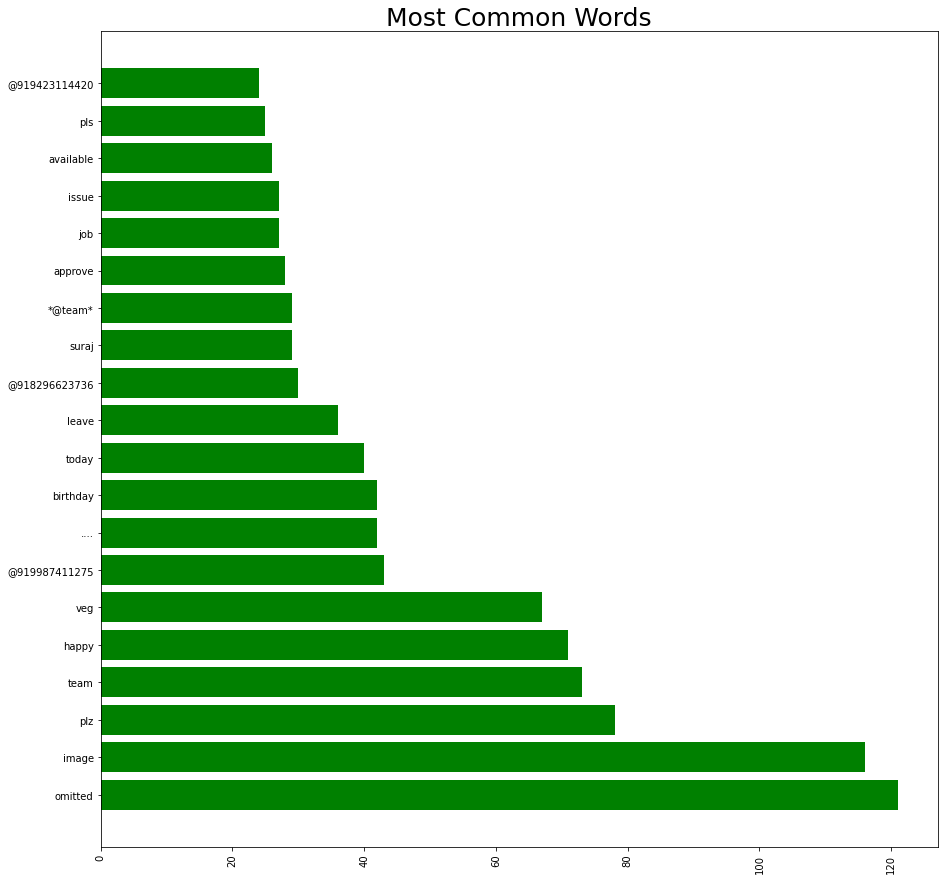

,0,1
0,omitted,121
1,image,116
2,plz,78
3,team,73
4,happy,71
5,veg,67
6,@919987411275,43
7,....,42
8,birthday,42
9,today,40


In [306]:
most_common_words('Overall', df)

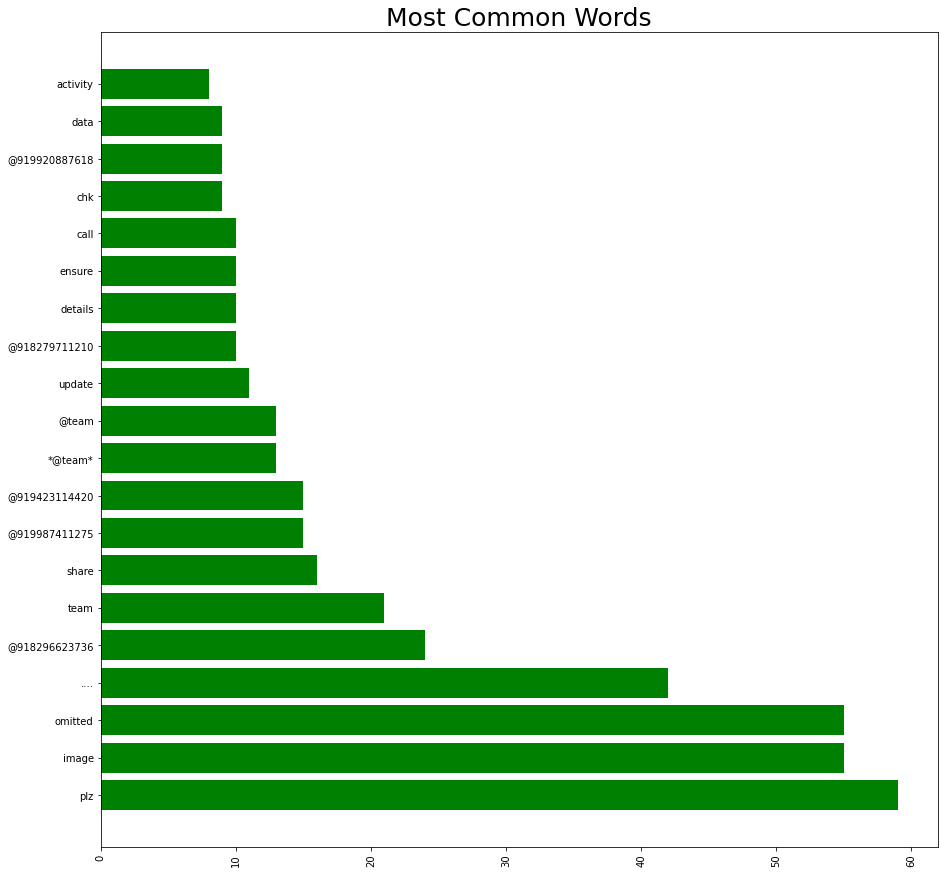

,0,1
0,plz,59
1,image,55
2,omitted,55
3,....,42
4,@918296623736,24
5,team,21
6,share,16
7,@919987411275,15
8,@919423114420,15
9,*@team*,13


In [307]:
most_common_words(' Yogesh Kotak Buddy', df)

### Most common words using NLP

The libraries required for the Natural Language Processing are being downloaded here.

In [146]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\L340 -
[nltk_data]     J4IN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\L340 -
[nltk_data]     J4IN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [308]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk import FreqDist

We can obtain most common used words in the messages using NLP as well and here we are doing it. Here we use word_tokenize() to split the text into tokens or words and the also the punctuation from string is used as one of the source for unwanted texts which filters the punctuations involved in the texts. Stopwords of nltk.corpus has stop words and we can get them by mentioning the language (here English) and it acts as stop words helping in filtering the words required for the analysis. Also, I have used stop_hinglish.txt as another source of stop words and used it here as well in filtering the words. Mainly here I have implemented regex which is compiled with pattern '[a-zA-Z]' which matches only with the alphabetic words (to be precise, words which starts with alphabetic words) where numbers and other extras like punctuations are not being involved. Strictly speaking it only analyses alphabetical words and returns the most common used alphabetical words.

In [309]:
def most_common_words_nlp_with_regex(selected_user, df):
  f = open('stop_hinglish.txt', 'r')
  stop_words = f.read()

  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  temp = df[df['user'] != 'group_notification']
  temp = temp[temp['message'] != '<Media omitted>\n']

  tempar = ""
  for char in temp['message']:
    if char not in punctuation:
      tempar += char
  words = word_tokenize(tempar)

  sw = set(stopwords.words("english"))
  filterd_words = [w.lower() for w in words if w not in sw]


  new_words = []
  for wor in filterd_words:
    if wor not in stop_words:
      new_words.append(wor)

  regex = re.compile('[a-zA-Z]')

  filtered = [i for i in new_words if regex.match(i)]

  filtered = FreqDist(filtered)
  most_common_df_nlp = pd.DataFrame(filtered.most_common(20))
  return most_common_df_nlp


In [310]:
most_common_words_nlp_with_regex('Overall', df)

,0,1
0,team,145
1,omitted,121
2,image,116
3,plz,78
4,happy,71
5,today,68
6,veg,67
7,birthday,42
8,leave,36
9,pls,32


In [311]:
most_common_words_nlp_with_regex(' Yogesh Kotak Buddy', df)

,0,1
0,plz,59
1,image,55
2,omitted,55
3,team,48
4,share,17
5,update,12
6,details,10
7,ensure,10
8,call,10
9,data,10


## Word Cloud

In [312]:
def create_wordcloud(selected_user, df):
  f = open('stop_hinglish.txt', 'r')
  stop_words = f.read()

  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  temp = df[df['user'] != 'group_notification']
  temp = temp[temp['message'] != '<Media omitted>\n']

  def remove_stop_words(message):
    y = []
    for word in message.lower().split():
        if word not in stop_words:
            y.append(word)
    return " ".join(y)

    

  wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')
  temp['message'] = temp['message'].apply(remove_stop_words)
  df_wc = wc.generate(temp['message'].str.cat(sep = " "))
  plt.title("Word Cloud", fontsize = 25)
  plt.imshow(df_wc)


create_wordcloud(selected_user, df) generates a word cloud (here, the size of each word indicates its frequency or importance in the chat) of the messages of both overall as a group and of a selected user of the group and it is visualized with a plot.

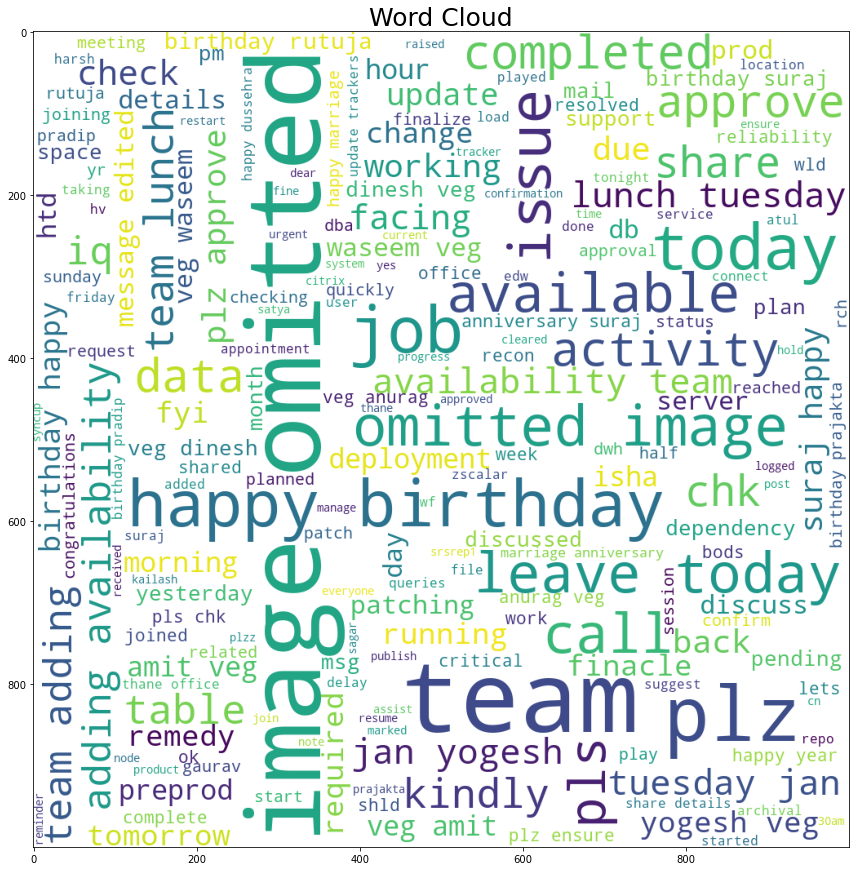

In [313]:
create_wordcloud('Overall', df)

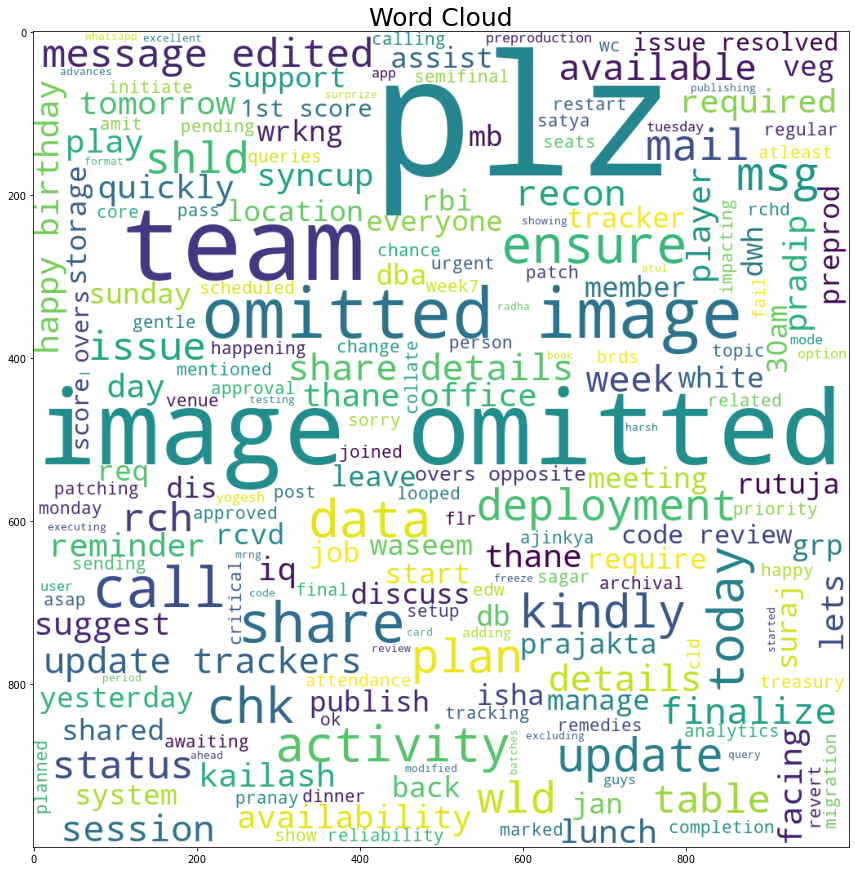

In [314]:
create_wordcloud(' Yogesh Kotak Buddy', df)

In [315]:
df.head()

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute
0,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...,2020,March,3,19,2020-03-19,Thursday,10,39
1,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n,2020,March,3,19,2020-03-19,Thursday,10,39
2,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n,2023,July,7,28,2023-07-28,Friday,14,47
3,2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA...",2023,July,7,28,2023-07-28,Friday,14,47
4,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...,2023,July,7,28,2023-07-28,Friday,14,49


In [316]:
df.year

0      2020
1      2020
2      2023
3      2023
4      2023
       ... 
958    2024
959    2024
960    2024
961    2024
962    2024
Name: year, Length: 963, dtype: int64

In [317]:
df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

,year,month_num,month,message
0,2020,3,March,2
1,2023,1,January,19
2,2023,2,February,25
3,2023,3,March,34
4,2023,4,April,26
5,2023,5,May,35
6,2023,6,June,27
7,2023,7,July,52
8,2023,8,August,127
9,2023,9,September,90


## Timeline Analysis

In [318]:
def monthly_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

    timeline['time'] = time

    plt.plot(timeline['time'], timeline['message'], color = 'black')
    plt.xticks(rotation = 'vertical')
    plt.show()

monthly_timeline(selected_user,df) returns a plot of monthly timeline of the messages which depicts how the number of messages varied on monthly basis of both overall as a group and of a selected user of the group.

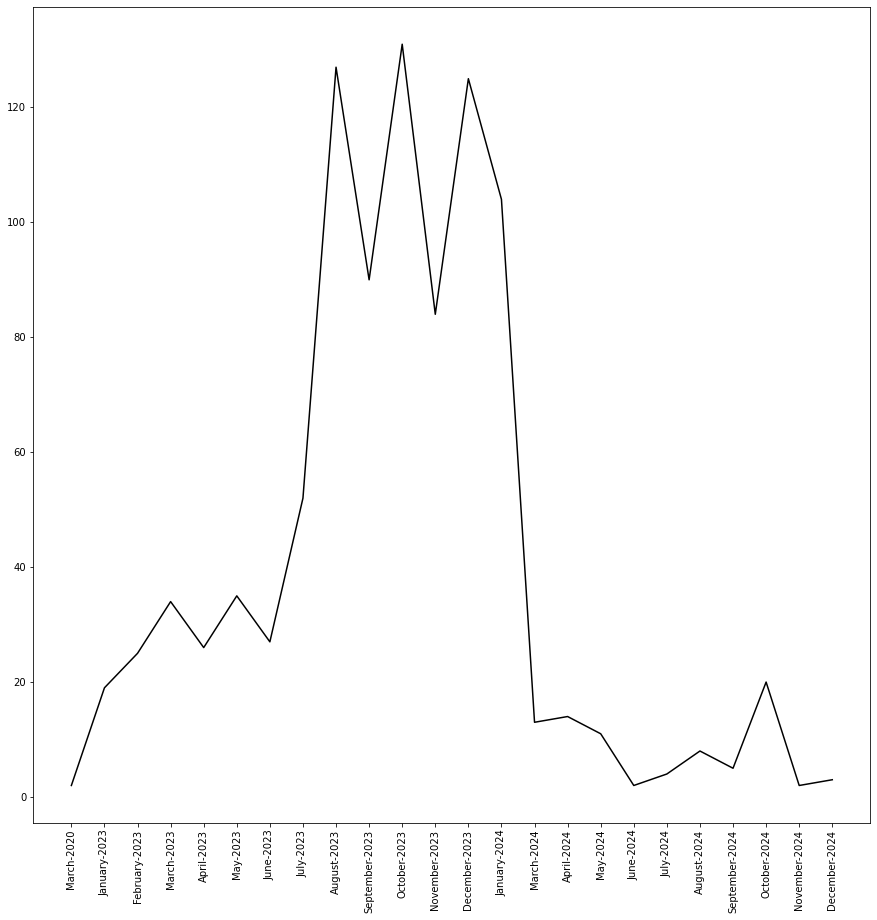

In [319]:
monthly_timeline('Overall',df)

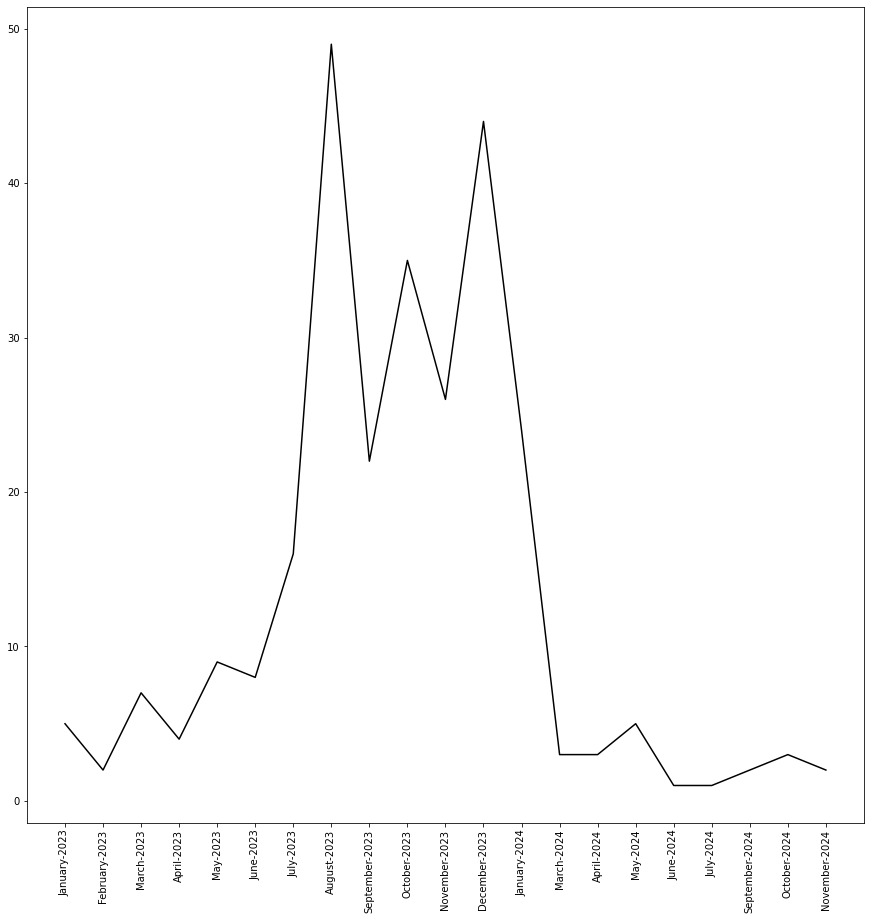

In [321]:
monthly_timeline(' Yogesh Kotak Buddy',df)

In [322]:
def daily_timeline(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  daily_timeline = df.groupby('only_date').count()['message'].reset_index()
  plt.plot(daily_timeline['only_date'], daily_timeline['message'], color = 'yellow')
  plt.xticks(rotation = 'vertical')
  plt.show()

daily_timeline(selected_user,df) returns a plot of daily timeline of the messages which depicts how the number of messages varied on daily basis with dates of different months of both overall as a group and of a selected user of the group.

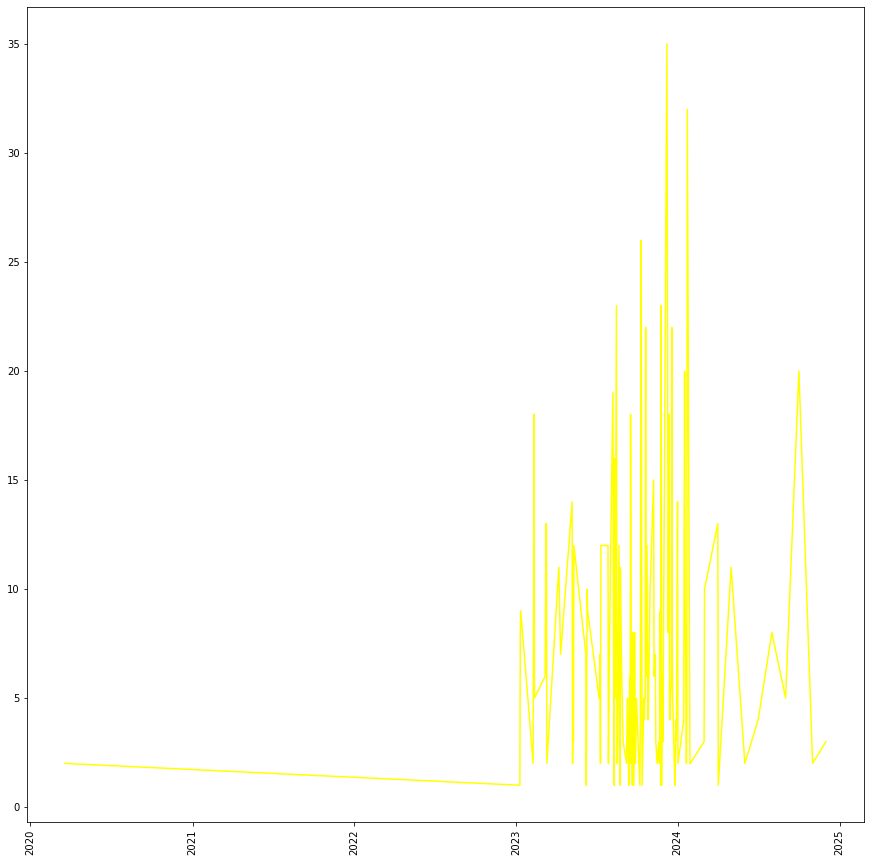

In [323]:
daily_timeline('Overall',df)

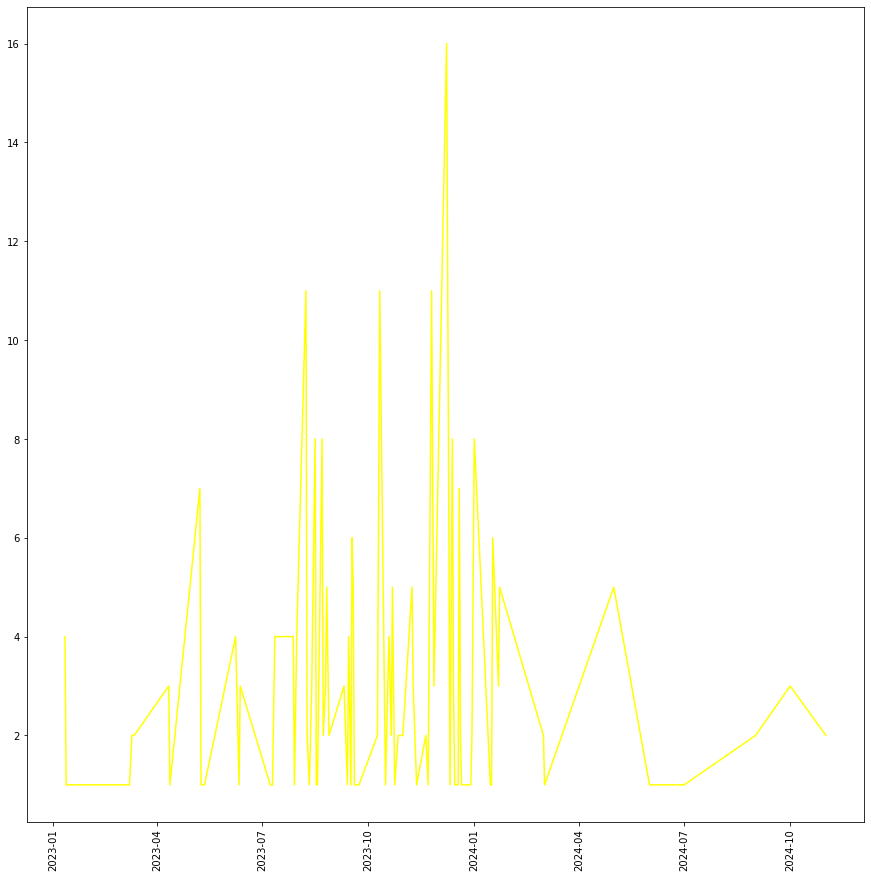

In [324]:
daily_timeline(' Yogesh Kotak Buddy',df)

In [325]:
def week_activity_map(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  busyday = df['day_name'].value_counts()

  plt.bar(busyday.index, busyday.values, color = 'brown')
  plt.show()

week_activity_map(selected_user,df) returns a bar plot of activity of the users on weekly basis from Sunday to Monday and returns how the number of messages vary on each day of the week, of both overall as a group and of a selected user of the group.

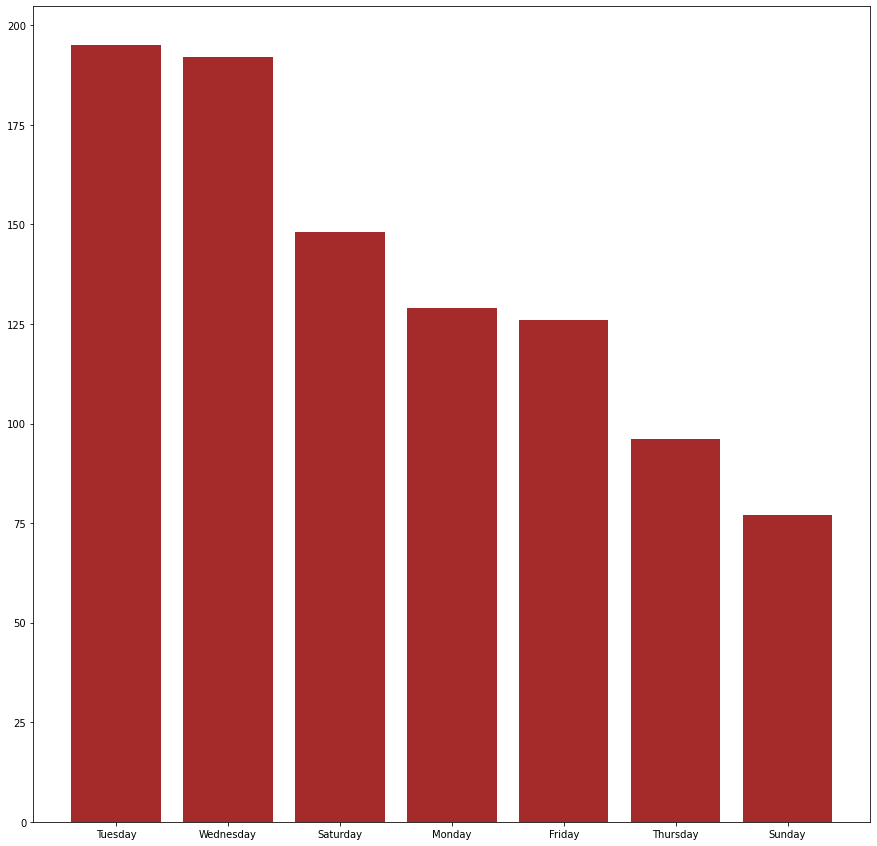

In [326]:
week_activity_map('Overall',df)

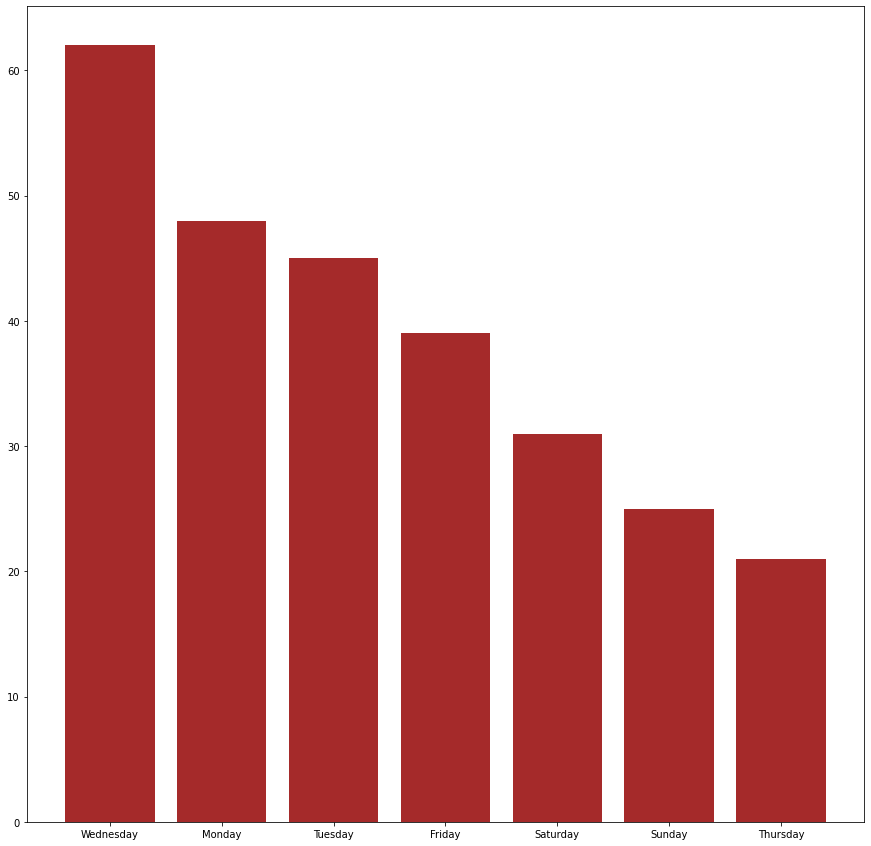

In [328]:
week_activity_map(' Yogesh Kotak Buddy',df)

In [329]:
def month_activity_map(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  busymonth = df['month'].value_counts()
  
  plt.bar(busymonth.index, busymonth.values, color = 'red')
  plt.show()

month_activity_map(selected_user,df) returns a bar plot of activity of the users on monthly basis from January to December and returns how the number of messages vary on each month of the year, of both overall as a group and of a selected user of the group.

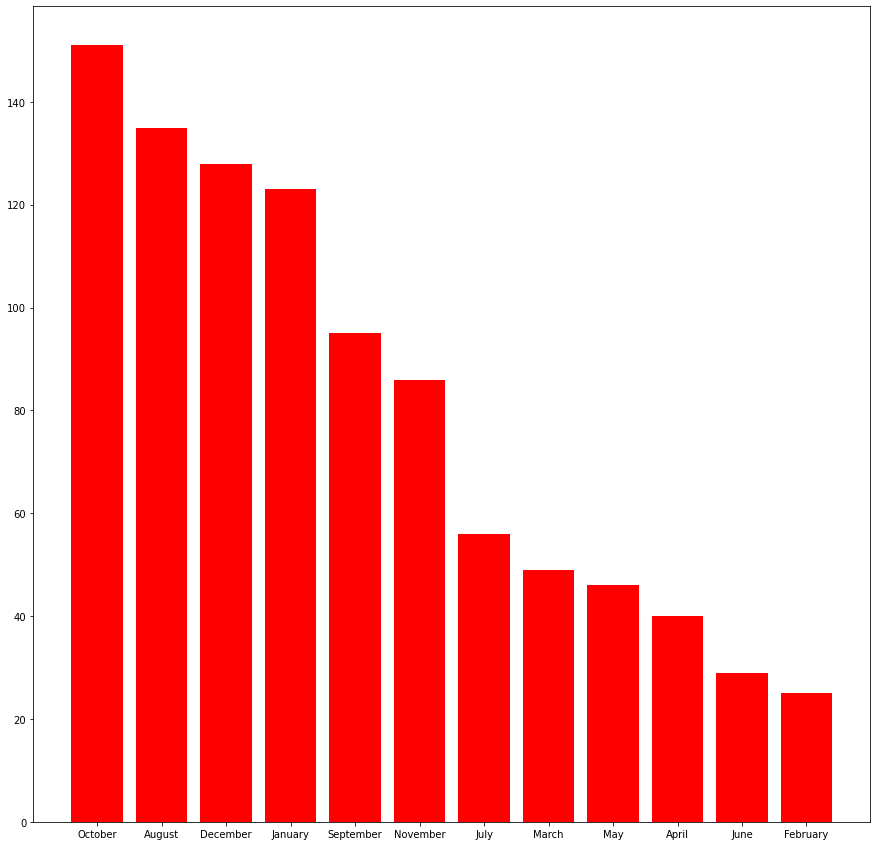

In [330]:
month_activity_map('Overall',df)

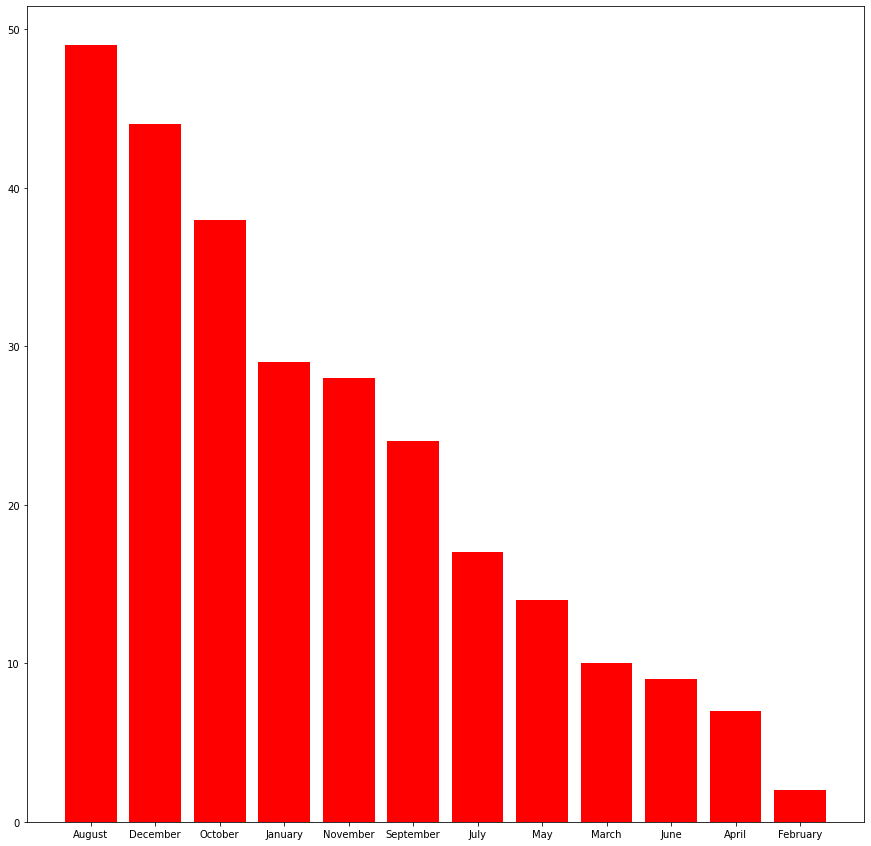

In [331]:
month_activity_map(' Yogesh Kotak Buddy',df)

In [332]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
  if hour == 23:
    period.append(str(hour) + "-" + str('00'))
  elif hour == 0:
    period.append(str('00') + "-" + str(hour + 1))
  else:
    period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df.head()

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute,period
0,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...,2020,March,3,19,2020-03-19,Thursday,10,39,10-11
1,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n,2020,March,3,19,2020-03-19,Thursday,10,39,10-11
2,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n,2023,July,7,28,2023-07-28,Friday,14,47,14-15
3,2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA...",2023,July,7,28,2023-07-28,Friday,14,47,14-15
4,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...,2023,July,7,28,2023-07-28,Friday,14,49,14-15


In [333]:
def activity_heatmap(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  plt.figure()
  user_heatmap = sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
  plt.yticks(rotation = 'horizontal')
  plt.show()


activity_heatmap(selected_user, df) returns a heatmap of user activity plotted, based on time period of a day (24 hours, from 00 to 23 o' clock) varying with the days of the week from Sunday to Monday and returns how the number of messages vary on each day of the week with the time period, of both overall as a group and of a selected user of the group.

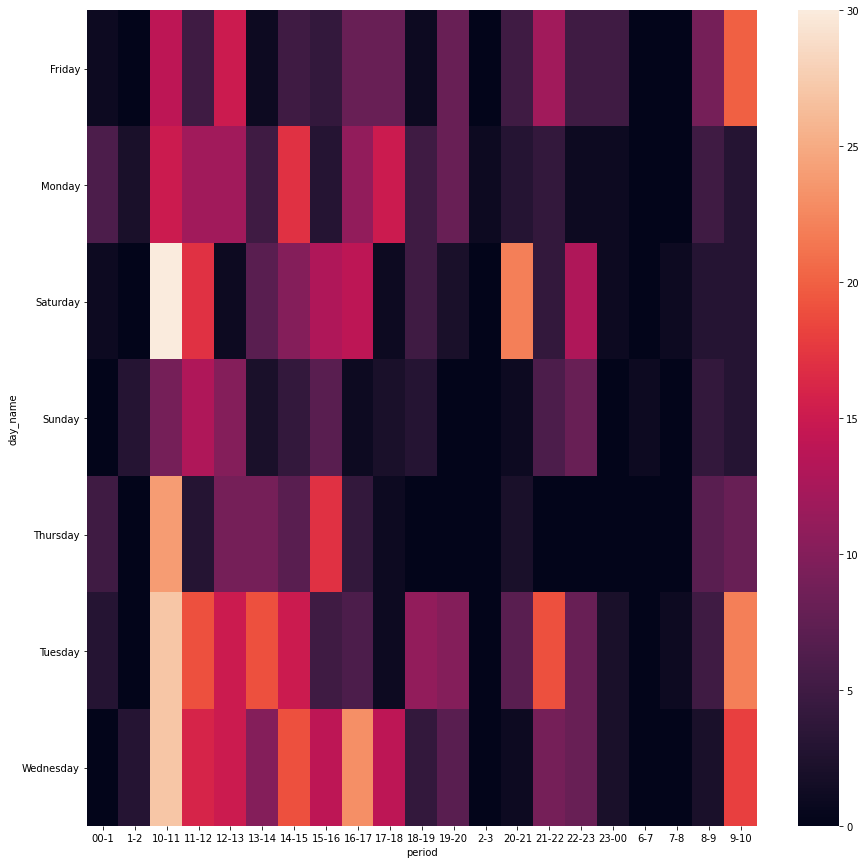

In [334]:
activity_heatmap('Overall',df)

In [335]:
activity_heatmap('Srinivas N',df)

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1080x1080 with 0 Axes>

In [336]:
df.head()

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute,period
0,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...,2020,March,3,19,2020-03-19,Thursday,10,39,10-11
1,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n,2020,March,3,19,2020-03-19,Thursday,10,39,10-11
2,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n,2023,July,7,28,2023-07-28,Friday,14,47,14-15
3,2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA...",2023,July,7,28,2023-07-28,Friday,14,47,14-15
4,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...,2023,July,7,28,2023-07-28,Friday,14,49,14-15


## Sentiment Analysis

Importing the SentimentIntensityAnalyzer function from nltk required for the sentiment analysis of the chat.

In [337]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [338]:
sentiments = SentimentIntensityAnalyzer()

df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in df["message"]]
df["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["message"]]
df["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["message"]]

The sentiment of the messages in the chat is being analyzed using polarity scores of the SentimentIntensityAnalyzer libraray and the messages are being divided into Positive, Negative and Neutral from the obtained result and have been updated them as separate new columns in the dataset, df.

In [339]:
df.head(10)

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute,period,Positive,Negative,Neutral
0,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Messages and calls are end-to-end encrypted. N...,2020,March,3,19,2020-03-19,Thursday,10,39,10-11,0.000,0.099,0.901
1,2020-03-19 10:39:47,Kotak-DWH-REL-IT-Team,Group creator created this group\n,2020,March,3,19,2020-03-19,Thursday,10,39,10-11,0.333,0.000,0.667
2,2023-07-28 14:47:12,Kotak-DWH-REL-IT-Team,Yogesh Kotak Buddy added you\n,2023,July,7,28,2023-07-28,Friday,14,47,14-15,0.000,0.000,1.000
3,2023-07-28 14:47:58,Yogesh Kotak Buddy,"Harsh, Isha, Rutuja, Sagar ... WC to IT WhatsA...",2023,July,7,28,2023-07-28,Friday,14,47,14-15,0.000,0.225,0.775
4,2023-07-28 14:49:24,Suraj Thakur Kotak Team,Hi All.. Kindly complete your Mandatory traini...,2023,July,7,28,2023-07-28,Friday,14,49,14-15,0.333,0.000,0.667
5,2023-07-28 15:03:09,Isha KOTAK,Yes Sir!\n,2023,July,7,28,2023-07-28,Friday,15,3,15-16,0.749,0.000,0.251
6,2023-07-28 15:12:35,Harsh Kotak,Yes sir \n,2023,July,7,28,2023-07-28,Friday,15,12,15-16,0.730,0.000,0.270
7,2023-07-28 15:48:25,~Satya Dixit (DWH RTB),This message was deleted.\n,2023,July,7,28,2023-07-28,Friday,15,48,15-16,0.000,0.000,1.000
8,2023-07-28 16:58:06,~Satya Dixit (DWH RTB),@918970110344 pls breif Suraj on job schedulin...,2023,July,7,28,2023-07-28,Friday,16,58,16-17,0.224,0.000,0.776
9,2023-07-28 16:58:29,~Nandi,Yeah sure\n,2023,July,7,28,2023-07-28,Friday,16,58,16-17,1.000,0.000,0.000


In [340]:
def sentiment_analyzer(selected_user, df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  x=sum(df["Positive"])
  y=sum(df["Negative"])
  z=sum(df["Neutral"])

  dat = [x, y, z]
  label = ['Positive', 'Negative', 'Neutral']

  plt.pie(dat, labels = label)
  plt.show()

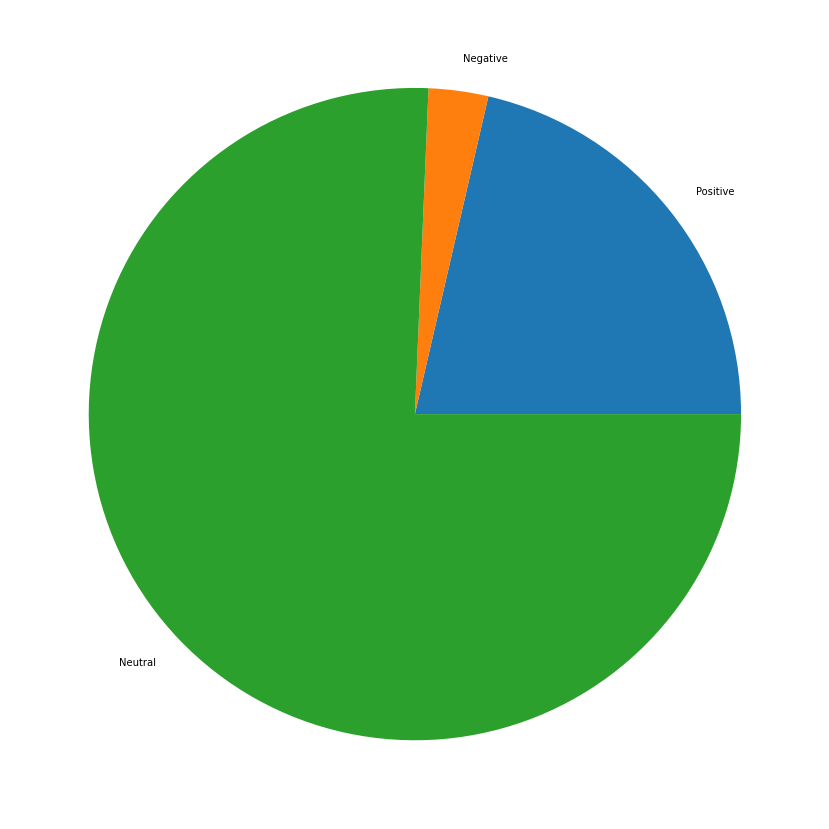

In [341]:
sentiment_analyzer('Overall', df)

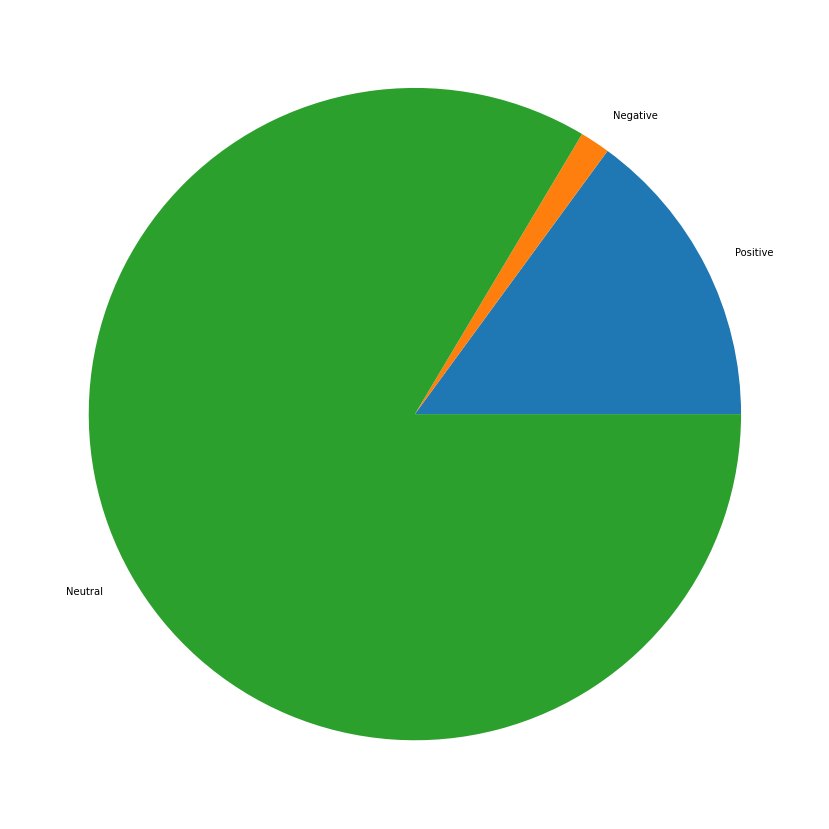

In [343]:
sentiment_analyzer(' Yogesh Kotak Buddy', df)